In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./input/heart.csv


# Attribute Information

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [32]:
df = pd.read_csv("./input/heart.csv")

# Check for null entries
if df.isnull().sum().any()>0:
    print(f"There are {df.isnull.sum()} number of null values in the dataset")
else:
    print(f"There are no null values in the dataset")

# Check for duplicates
if df.duplicated().any()>0:
    print(f"The number of duplicated rows in the datasets are {df.duplicated().sum()}")
else:
    print(f'There are no duplicated rows in the dataset\n\n')

# Show head of data set
df.head()

There are no null values in the dataset
There are no duplicated rows in the dataset




,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [34]:
df_processed = df
# Convert Object data into integers to help with visualization

df_processed['Sex'] = df_processed['Sex'].replace(['M','F'],[0,1])

# TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic
df_processed['ChestPainType'] = df_processed['ChestPainType'].replace(['TA','ATA', 'NAP', 'ASY'],[0,1,2,3])

#  Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy
df_processed['RestingECG'] = df_processed['RestingECG'].replace(['Normal','ST', 'LVH'],[0,1,2])

# Y: Yes, N: No
df_processed['ExerciseAngina'] = df_processed['ExerciseAngina'].replace(['N','Y'],[0,1])

# Up: upsloping, Flat: flat, Down: downsloping
df_processed['ST_Slope'] = df_processed['ST_Slope'].replace(['Up','Flat', 'Down'],[0,1,2])

df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


## Data Visualization  


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

# Filter out FutureWarning -- From www.kaggle.com/code/naveen1729/heart-failure-prediction-multilayer-perceptron
warnings.filterwarnings("ignore", category=FutureWarning)

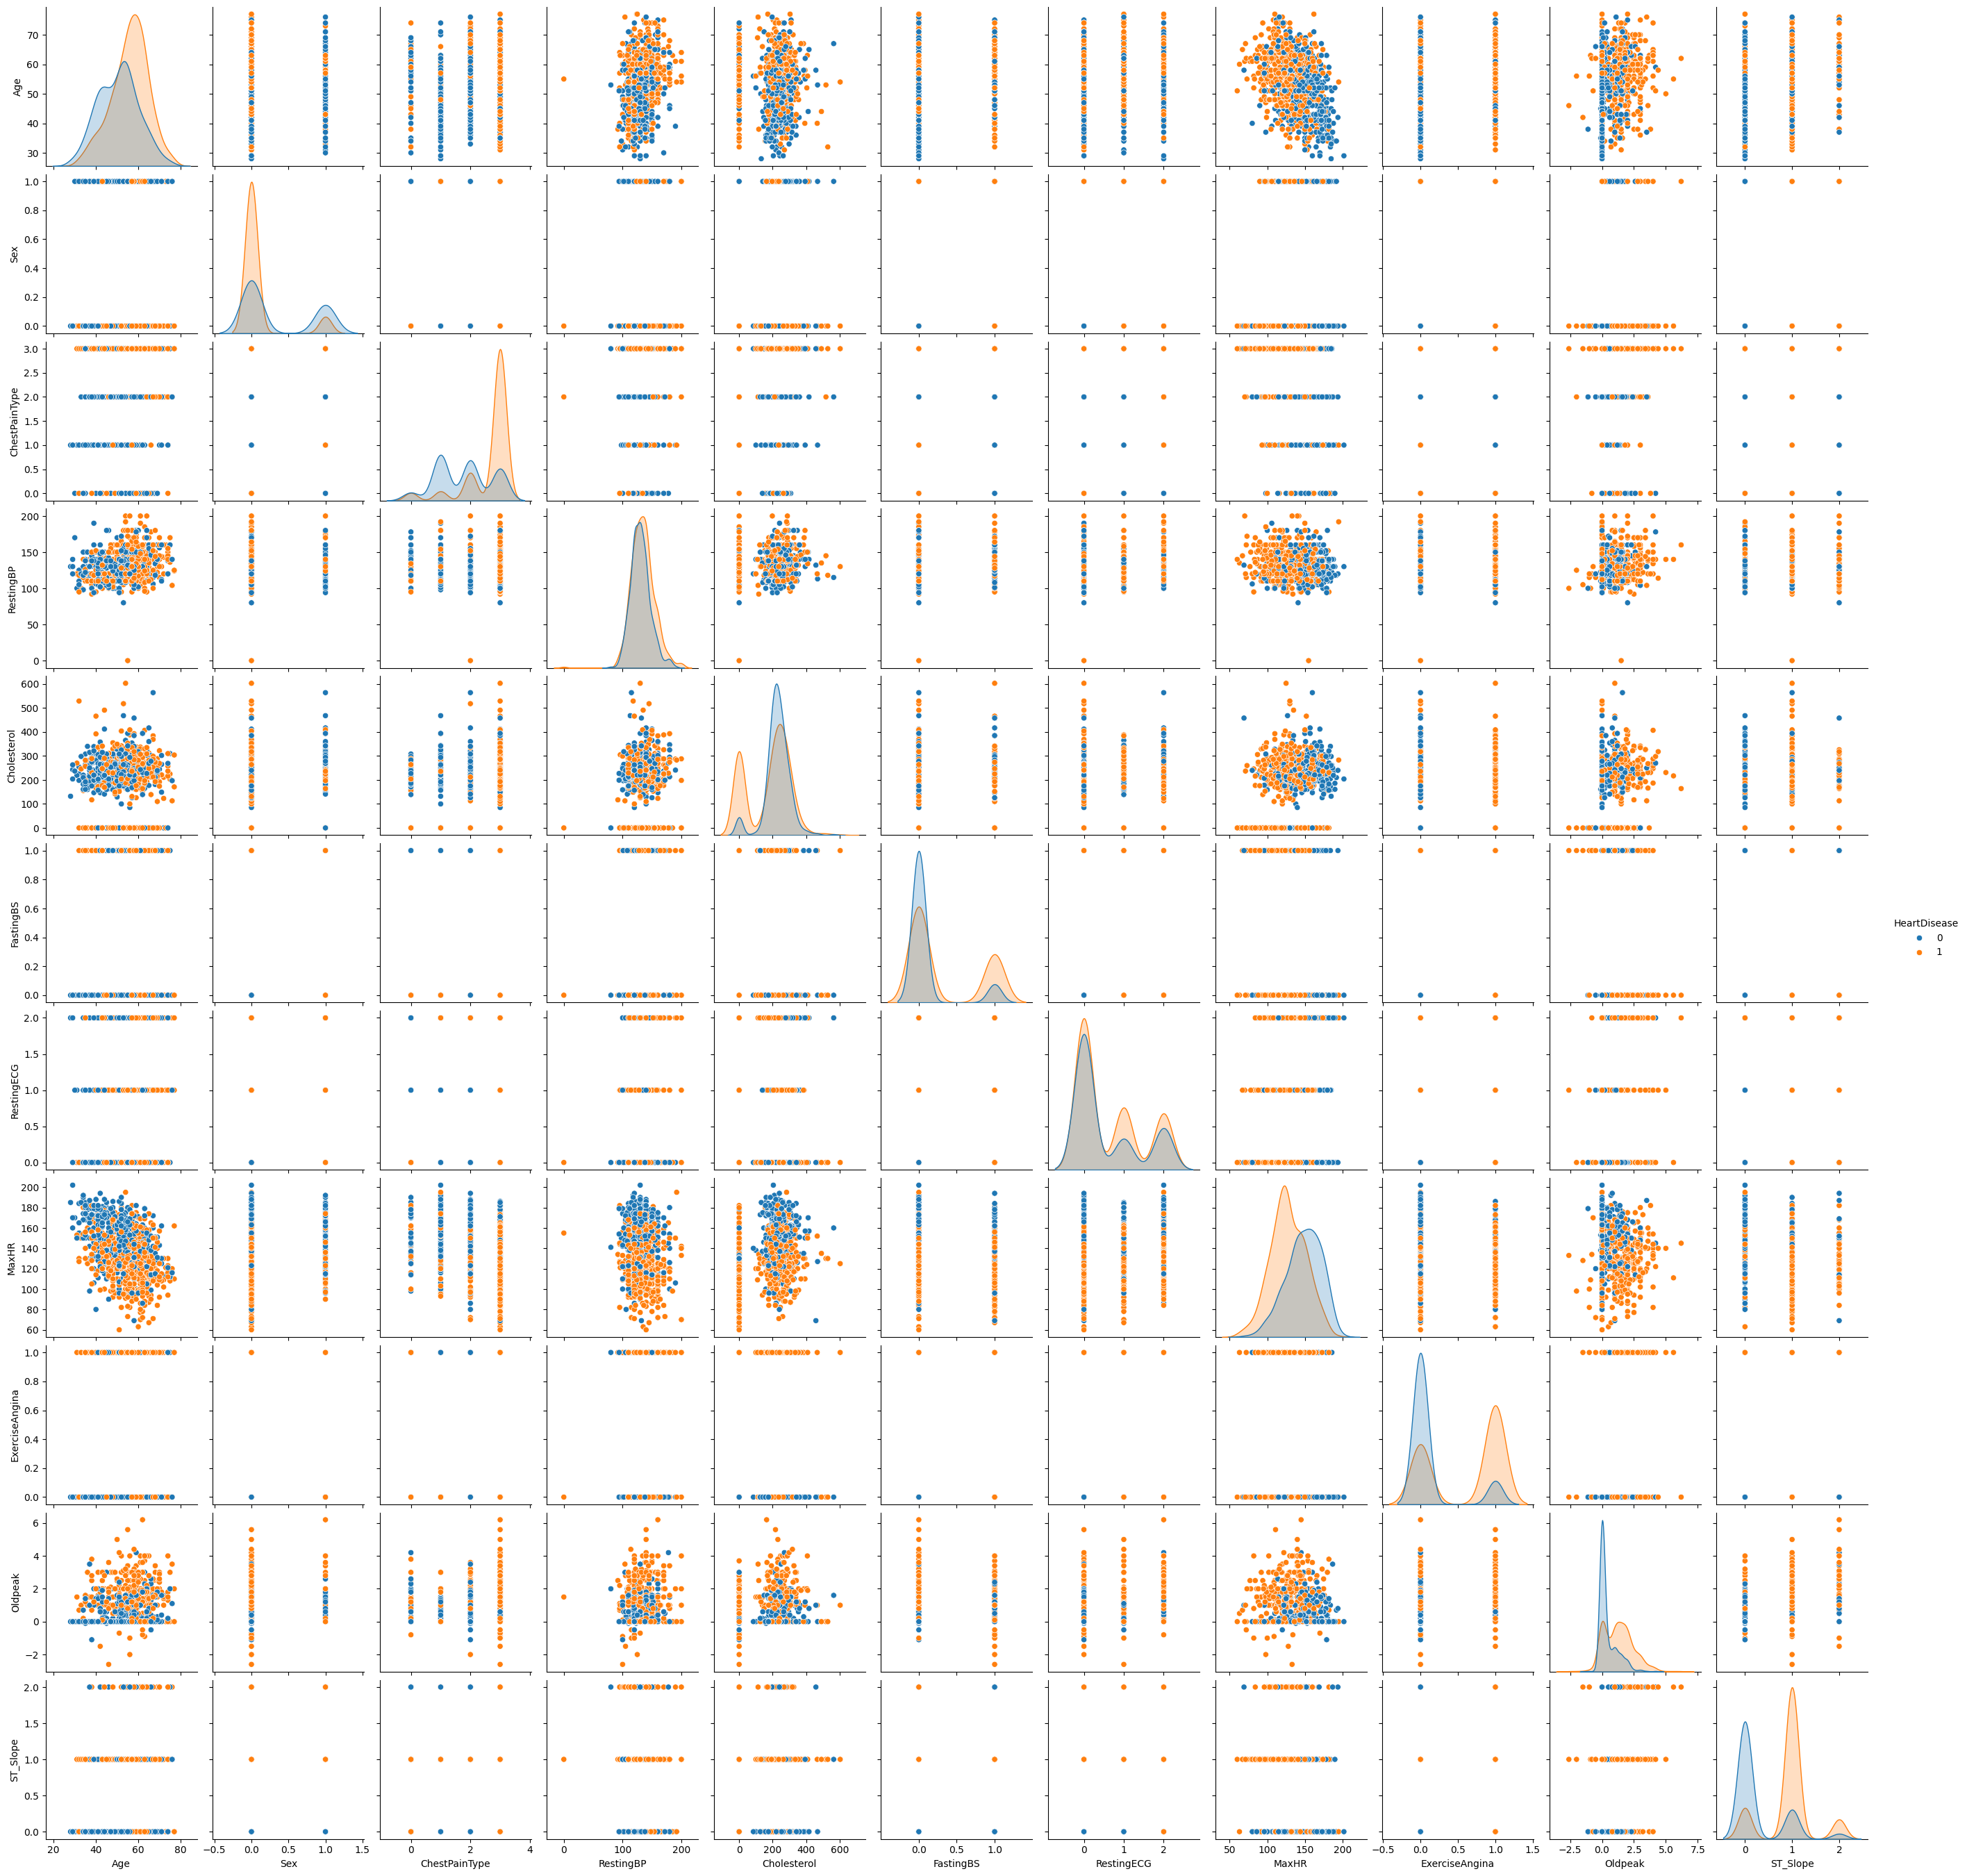

In [36]:
sns.pairplot(df_processed, hue='HeartDisease')
plt.savefig("./output/figures/pairplot.png")


## Initial Findings and thoughts
- ST Slope: Flat looks significant
- Old Peak: Higher -> Great increase of heart disease 
- ExerciseAngina: Yes -> indicates increased risk

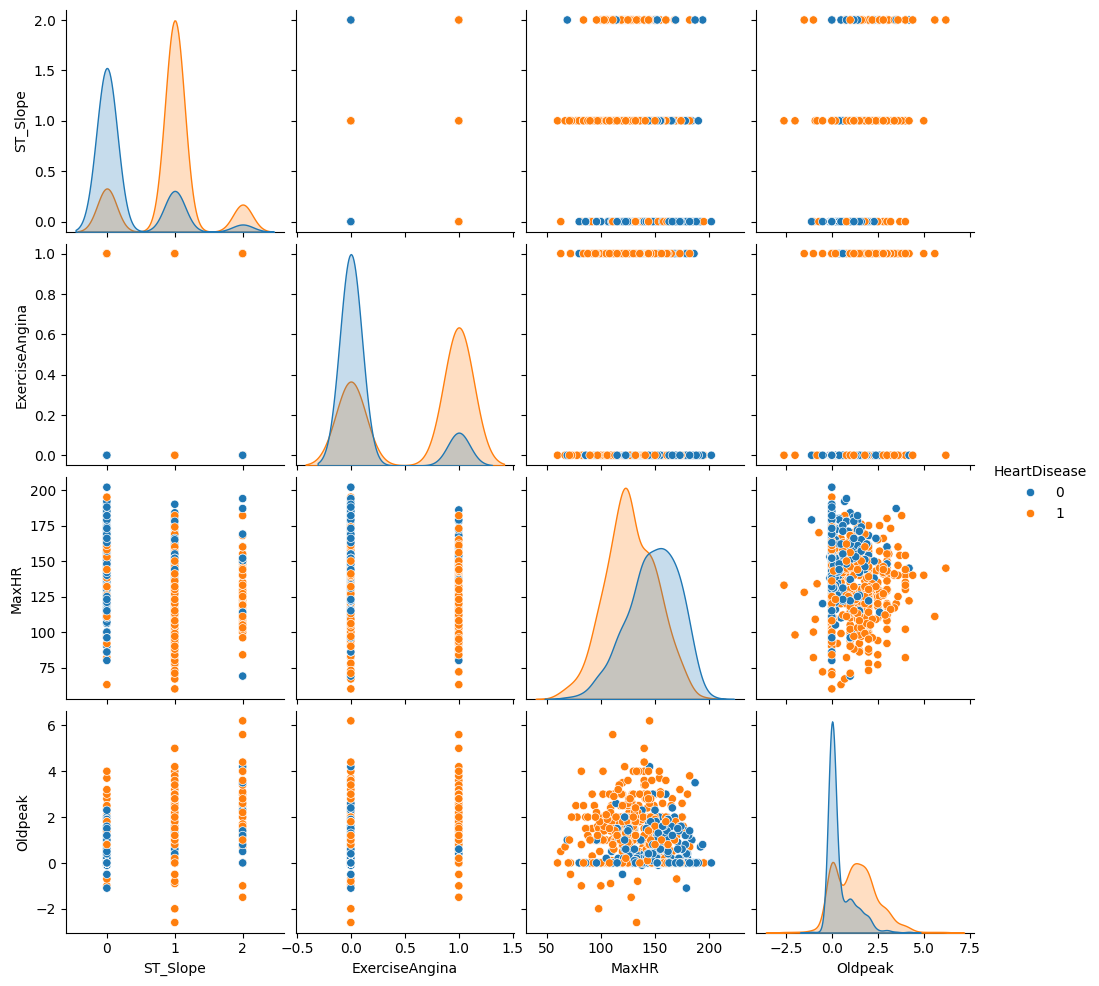

In [37]:
sns.pairplot(df_processed[['HeartDisease', 'ST_Slope', 'ExerciseAngina', 'MaxHR', 'Oldpeak']], hue='HeartDisease')
plt.savefig("./output/figures/pairplot2.png")

# Model Generation

In [38]:
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

## Random Forest Model

In [39]:
X = df_processed.drop(columns=['HeartDisease'])
y = df_processed.loc[:, 'HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=1,
                                   test_size=0.2,
                                   shuffle=True)

print(f"Size of full data set : {y.size}")
print(f"Size of training data set : {y_train.size}")
print(f"Size of testing data set : {y_test.size}")


Size of full data set : 918
Size of training data set : 734
Size of testing data set : 184


In [40]:
## MASSIVE SWEEP TAKES HOURS TO RUN -- Not Required I initially tried this to get some insight on suitable hyper-params

# # Massiv Sweep of all tuning params
# n_trees = [n*25 for n in range(4,15)]
# max_depth = [n for n in range(2,30)]
# max_depth.append(None)
# max_features = ['sqrt', 'log2', None]
# criterion = ['gini', 'entropy', 'log_loss']
# alphas = [5 * 10**n for n in range(-4,-1)]
# alphas.append(0)


# n_folds = 8
# cv = KFold(n_splits=n_folds, shuffle=True, random_state=1)
# rf = RandomForestClassifier(random_state=7)

# space = {
#     'criterion': criterion,
#     'n_estimators' : n_trees,
#     'max_depth' : max_depth,
#     'max_features' : max_features,
#     'ccp_alpha' : alphas
# }

# rf = RandomForestClassifier(random_state=1)
# rfSearch = GridSearchCV(rf, space, scoring='accuracy', n_jobs=-1, cv=cv) # CV is the kfold
# rfSearchResults = rfSearch.fit(X_train, y_train)

# joblib.dump(rfSearch, './output/rfSearch_object.pkl')



In [41]:
model = joblib.load("./output/rfSearch_object.pkl")

model.best_params_

{'ccp_alpha': 0.005,
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'sqrt',
 'n_estimators': 325}

In [42]:
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
ypred_full = model.predict(X)

acc_test = metrics.accuracy_score(y_test, ypred_test)
acc_train = metrics.accuracy_score(y_train, ypred_train)
acc_full = metrics.accuracy_score(y, ypred_full)

print(f"Train Accuracy {acc_train}")
print(f"Test Accuracy {acc_test}")
print(f"Full Data Set {acc_full}")

Train Accuracy 0.9645776566757494
Test Accuracy 0.8858695652173914
Full Data Set 0.94880174291939


Gini Test Max Accuracy 0.9293478260869565 at index 15
Gini Train Max Accuracy 1.0 at index 0

Entropy Test Max Accuracy 0.9239130434782609 at index 33
Entropy Train Max Accuracy 1.0 at index 0



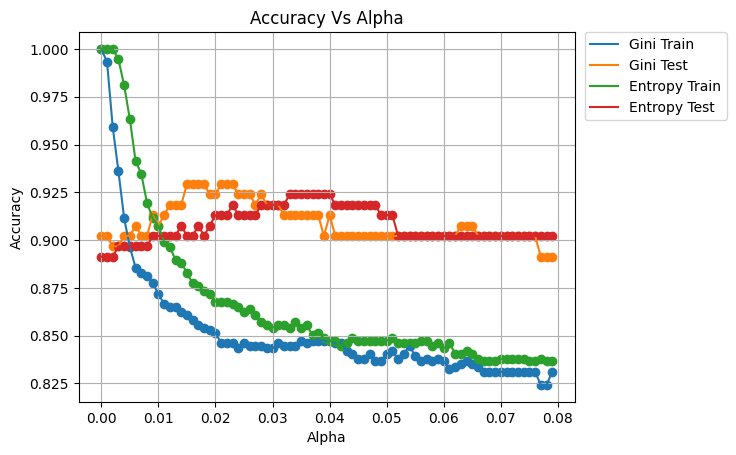

In [43]:
# Alphas to test

alphas = [n * 10**(-3) for n in range(80)]

results_train = []
results_test = []
results_test_entropy = []
results_train_entropy = []

for alpha in alphas:
    rf = RandomForestClassifier(random_state= 7, n_estimators=325, max_features='sqrt', criterion='gini', ccp_alpha=alpha, max_depth=14)
    rf.fit(X=X_train, y=y_train)
    ypred_test = rf.predict(X_test)
    ypred_train = rf.predict(X_train)
    results_test.append(metrics.accuracy_score(y_test, ypred_test))
    results_train.append(metrics.accuracy_score(y_train, ypred_train))


for alpha in alphas:
    rf = RandomForestClassifier(random_state= 7, n_estimators=325, max_features='sqrt', criterion='entropy', ccp_alpha=alpha, max_depth=14)
    rf.fit(X=X_train, y=y_train)
    ypred_test = rf.predict(X_test)
    ypred_train = rf.predict(X_train)
    results_test_entropy.append(metrics.accuracy_score(y_test, ypred_test))
    results_train_entropy.append(metrics.accuracy_score(y_train, ypred_train))



print(f"Gini Test Max Accuracy {max(results_test)} at index {results_test.index(max(results_test))}")
print(f"Gini Train Max Accuracy {max(results_train)} at index {results_train.index(max(results_train))}\n")

print(f"Entropy Test Max Accuracy {max(results_test_entropy)} at index {results_test_entropy.index(max(results_test_entropy))}")
print(f"Entropy Train Max Accuracy {max(results_train_entropy)} at index {results_train_entropy.index(max(results_train_entropy))}\n")


plt.plot(alphas, results_train, label='Gini Train')
plt.scatter(alphas, results_train)
plt.plot(alphas, results_test, label='Gini Test')
plt.scatter(alphas, results_test)
plt.plot(alphas, results_train_entropy, label='Entropy Train')
plt.scatter(alphas, results_train_entropy)
plt.plot(alphas, results_test_entropy, label='Entropy Test')
plt.scatter(alphas, results_test_entropy)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title("Accuracy Vs Alpha")
plt.grid(which="both")
plt.savefig("./output/figures/RF_alphaSweep.png", bbox_inches='tight')
plt.show()

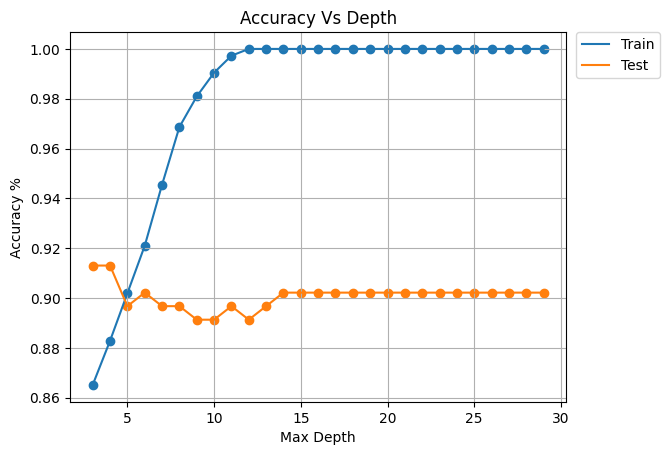

Test Accuracy None 0.9021739130434783 
Train Accuracy None 1.0 


In [44]:
# Sweep Max Depth
depths = [n for n in range(3,30)]
depths.append(None)

results_test = []
results_train = []
for depth in depths:
    rf = RandomForestClassifier(random_state= 7, n_estimators=325, max_features='sqrt', criterion='gini', ccp_alpha=0, max_depth=depth)
    rf.fit(X=X_train, y=y_train)
    ypred_test = rf.predict(X_test)
    ypred_train = rf.predict(X_train)
    results_test.append(metrics.accuracy_score(y_test, ypred_test))
    results_train.append(metrics.accuracy_score(y_train, ypred_train))


plt.plot(depths, results_train, label='Train')
plt.scatter(depths, results_train)
plt.plot(depths, results_test, label='Test')
plt.scatter(depths, results_test)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy %')
plt.title("Accuracy Vs Depth")
plt.grid(which="both")
plt.savefig("./output/figures/RF_depthSweep.png", bbox_inches='tight')
plt.show()

print(f"Test Accuracy None {results_test[-1]} ")
print(f"Train Accuracy None {results_train[-1]} ")



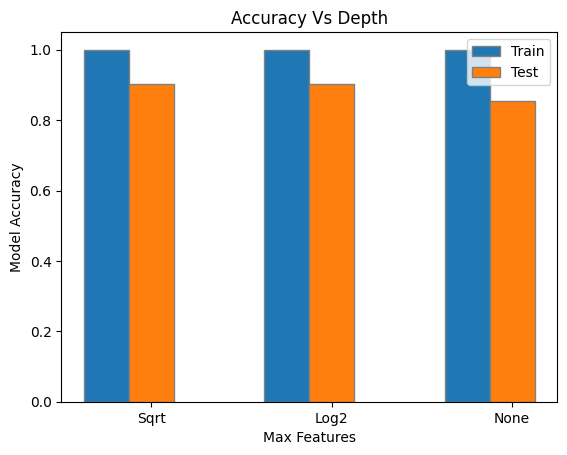

[0.9021739130434783, 0.9021739130434783, 0.8532608695652174]

In [45]:
# Sweep Max Features
max_features = ['sqrt', 'log2', None]

results_test = []
results_train = []
for feature in max_features:
    rf = RandomForestClassifier(random_state=7, n_estimators=325, max_features=feature, criterion='gini', ccp_alpha=0, max_depth=None)
    rf.fit(X=X_train, y=y_train)
    ypred_test = rf.predict(X_test)
    ypred_train = rf.predict(X_train)
    results_test.append(metrics.accuracy_score(y_test, ypred_test))
    results_train.append(metrics.accuracy_score(y_train, ypred_train))

barWidth = 0.25

br1 = np.arange(len(results_train))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.bar(br1, results_train, width = barWidth, edgecolor ='grey', label ="Train")
plt.bar(br2, results_test, width = barWidth, edgecolor ='grey', label ="Test")

plt.xlabel('Max Features')
plt.ylabel('Model Accuracy')
max_features_names = ['Sqrt', 'Log2', 'None']
plt.xticks([r + barWidth for r in range(len(results_test))], max_features_names)
plt.title("Accuracy Vs Depth")
plt.legend()
plt.savefig("./output/figures/RF_maxFeatureSweep.png")
plt.show()

results_test

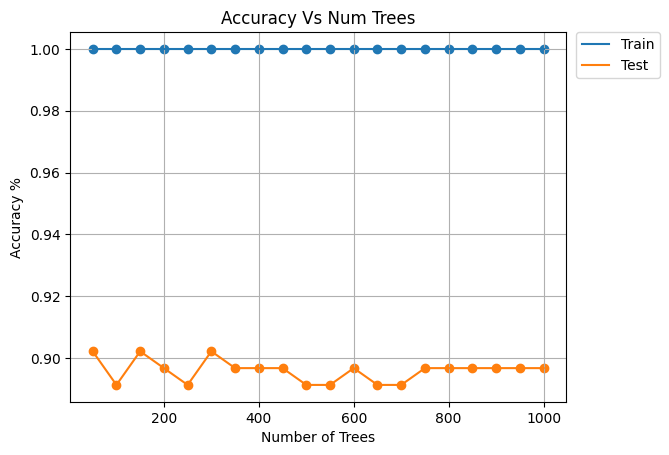

In [46]:
# Finally Sweep num trees

trees = [50 * n for n in range(1,21)]

results_test = []
results_train = []
for tree in trees:
    rf = RandomForestClassifier(random_state= 7, n_estimators=tree, max_features='sqrt', criterion='gini', ccp_alpha=0, max_depth=15)
    rf.fit(X=X_train, y=y_train)
    ypred_test = rf.predict(X_test)
    ypred_train = rf.predict(X_train)
    results_test.append(metrics.accuracy_score(y_test, ypred_test))
    results_train.append(metrics.accuracy_score(y_train, ypred_train))


plt.plot(trees, results_train, label='Train')
plt.scatter(trees, results_train)
plt.plot(trees, results_test, label='Test')
plt.scatter(trees, results_test)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy %')
plt.title("Accuracy Vs Num Trees")
plt.grid(which="both")
plt.savefig("./output/figures/RF_treeSweep.png", bbox_inches='tight')
plt.show()



## Findings on Random Forest Tuning

Repeat sweep given the following findings

- Num trees does not show any benfits above 350
- Sqrt and log2 for max features used show no meaning full difference 
    - using all features showed worse performance 
- Max depth should be swept from 2 - 15 
    - 2 to 5 looks promising 
- perform finer sweep of alpha from 0.001 - 0.02

In [47]:
# Repeat Sweep Given new insights

alphas = [n*0.001 for n in range(21)]
max_depth = [3, 4, 5, 7, 10, 15]

space = {
    'max_depth' : max_depth,
    'ccp_alpha' : alphas
}

n_folds = 8
cv = KFold(n_splits=n_folds, shuffle=True, random_state=1)
rf = RandomForestClassifier(random_state=7, n_estimators=350, max_features='sqrt', criterion='gini')
rfSearch = GridSearchCV(rf, space, scoring='accuracy', n_jobs=-1, cv=cv) # CV is the kfold
rfSearchResults = rfSearch.fit(X_train, y_train)
joblib.dump(rfSearchResults, './output/rfFinalSearch_object.pkl')


ypred_train = rfSearchResults.predict(X_train)
ypred_test = rfSearchResults.predict(X_test)
ypred_full = rfSearchResults.predict(X)

acc_test = metrics.accuracy_score(y_test, ypred_test)
acc_train = metrics.accuracy_score(y_train, ypred_train)
acc_full = metrics.accuracy_score(y, ypred_full)

print(f"Train Accuracy {acc_train}")
print(f"Test Accuracy {acc_test}")
print(f"Full Data Set {acc_full}\n\n")
print(rfSearchResults.best_params_)


Train Accuracy 0.9305177111716622
Test Accuracy 0.9021739130434783
Full Data Set 0.9248366013071896


{'ccp_alpha': 0.003, 'max_depth': 10}


In [48]:
# No - Improvement found -- commented out to reduce notebook run time
# # Repeat with finer selection

# alphas = [0.0025, 0.00275, 0.003, 0.00325, 0.0035, 0.00375]
# max_depth = [8, 9, 10, 11, 12, 13]

# space = {
#     'max_depth' : max_depth,
#     'ccp_alpha' : alphas
# }

# n_folds = 8
# cv = KFold(n_splits=n_folds, shuffle=True, random_state=1)
# rf = RandomForestClassifier(random_state=7, n_estimators=350, max_features='sqrt', criterion='gini')
# rfSearch = GridSearchCV(rf, space, scoring='accuracy', n_jobs=-1, cv=cv) # CV is the kfold
# rfSearchRefinedResults = rfSearch.fit(X_train, y_train)
# joblib.dump(rfSearchRefinedResults, './output/rfFinalSearch2_object.pkl')

# ypred_train = rfSearchRefinedResults.predict(X_train)
# ypred_test = rfSearchRefinedResults.predict(X_test)
# ypred_full = rfSearchRefinedResults.predict(X)

# acc_test = metrics.accuracy_score(y_test, ypred_test)
# acc_train = metrics.accuracy_score(y_train, ypred_train)
# acc_full = metrics.accuracy_score(y, ypred_full)

# print(f"Train Accuracy {acc_train}")
# print(f"Test Accuracy {acc_test}")
# print(f"Full Data Set {acc_full}\n\n")
# print(rfSearchRefinedResults.best_params_)

Train Accuracy 0.9427792915531336
Test Accuracy 0.8913043478260869
Full Data Set 0.9324618736383442


{'ccp_alpha': 0.0025, 'max_depth': 11}


In [51]:

## Takes a long time to run -- no improvement found
# # Vary K-Fold
# folds = [5, 10, 15, 20, 25, 30]
# alphas = [0.0025, 0.003, 0.0035]
# max_depth = [9, 10, 11]
# space = {
#     'max_depth' : max_depth,
#     'ccp_alpha' : alphas
# }

# best_attrs = []
# models = []
# train_acc = []
# test_acc = []
# full_acc = []

# for fold in folds:
#     cv = KFold(n_splits=fold, shuffle=True, random_state=1)
#     rfSearch = GridSearchCV(rf, space, scoring='accuracy', n_jobs=-1, cv=cv) # CV is the kfold
#     rfSearchResults = rfSearch.fit(X_train, y_train)

#     ypred_train = rfSearchResults.predict(X_train)
#     ypred_test = rfSearchResults.predict(X_test)
#     ypred_full = rfSearchResults.predict(X)

#     acc_test = metrics.accuracy_score(y_test, ypred_test)
#     acc_train = metrics.accuracy_score(y_train, ypred_train)
#     acc_full = metrics.accuracy_score(y, ypred_full)

#     best_attrs.append(rfSearchResults.best_params_)
#     models.append(rfSearchResults)
#     train_acc.append(acc_train)
#     test_acc.append(acc_test)
#     full_acc.append(acc_full)
#     print(rfSearchResults.best_params_)
#     print(f"\nTrain Accuracy {acc_train}")
#     print(f"Test Accuracy {acc_test}")
#     print(f"Full Data Set {acc_full}\n\n\n\n")

# print(max(test_acc))
# print(max(full_acc))

## Tuning results

- Sweeping number of folds showed no significant difference 
- Smaller sweep of values over-fitted to training data 

### FINAL Params 

- alpha = 0.003
- Max Depth = 10

In [52]:
space = {}
n_folds = 10
cv = KFold(n_splits=n_folds, shuffle=True, random_state=1)
rf = RandomForestClassifier(random_state=7, n_estimators=350, max_features='sqrt', criterion='gini', max_depth=10, ccp_alpha=0.0025)
rfSearch = GridSearchCV(rf, space, scoring='accuracy', n_jobs=-1, cv=cv) # CV is the kfold
rfFinalResults = rfSearch.fit(X_train, y_train)
joblib.dump(rfFinalResults, './output/rfFinal_object.pkl')


ypred_train = rfFinalResults.predict(X_train)
ypred_test = rfFinalResults.predict(X_test)
ypred_full = rfFinalResults.predict(X)

acc_test = metrics.accuracy_score(y_test, ypred_test)
acc_train = metrics.accuracy_score(y_train, ypred_train)
acc_full = metrics.accuracy_score(y, ypred_full)

print(f"Train Accuracy {acc_train}")
print(f"Test Accuracy {acc_test}")
print(f"Full Data Set {acc_full}\n\n")



Train Accuracy 0.944141689373297
Test Accuracy 0.9021739130434783
Full Data Set 0.9357298474945533




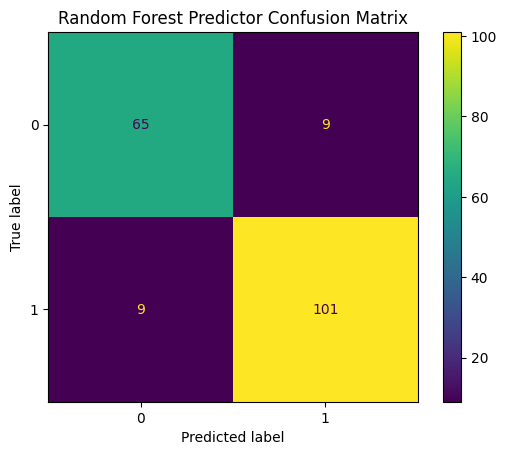

In [53]:
ConfusionMatrixDisplay.from_predictions(y_test, ypred_test)
plt.title("Random Forest Predictor Confusion Matrix")
plt.savefig("./output/figures/RF_testConfusionMatrix.png")



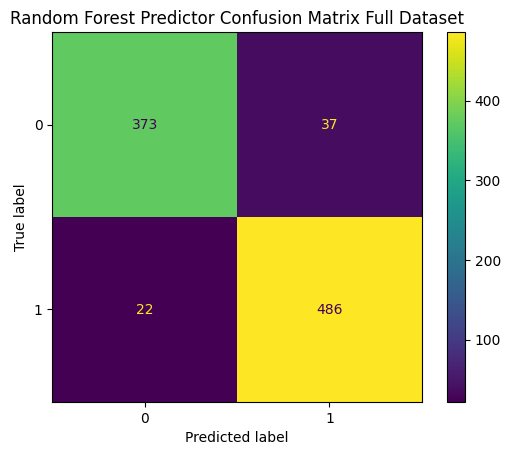

In [54]:
ConfusionMatrixDisplay.from_predictions(y, ypred_full)
plt.title("Random Forest Predictor Confusion Matrix Full Dataset")
plt.savefig("./output/figures/RF_fullConfusionMatrix.png")

# SVM

In [55]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


In [56]:
# Normalize Data
X_norm = (X-X.mean())/X.std()
X_train_norm = (X_train-X_train.mean())/X_train.std()
X_test_norm = (X_test-X_train.mean())/X_train.std()

X_train_norm.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
852,-1.115439,-0.521274,0.805026,-0.705261,-0.182193,-0.546541,1.717267,-0.684117,1.236507,1.585241,0.657718
121,-0.149447,1.915764,-0.267368,-0.424015,0.672338,-0.546541,-0.759106,0.069612,-0.807628,-0.810507,-1.048165
664,1.245876,1.915764,0.805026,0.982216,0.249570,-0.546541,1.717267,-0.922137,-0.807628,0.147792,0.657718
187,-1.330104,-0.521274,0.805026,-0.705261,0.357511,1.827195,-0.759106,0.029942,1.236507,0.147792,0.657718
108,-0.364112,-0.521274,0.805026,0.419724,-0.613956,-0.546541,-0.759106,-0.089068,-0.807628,-0.810507,-1.048165


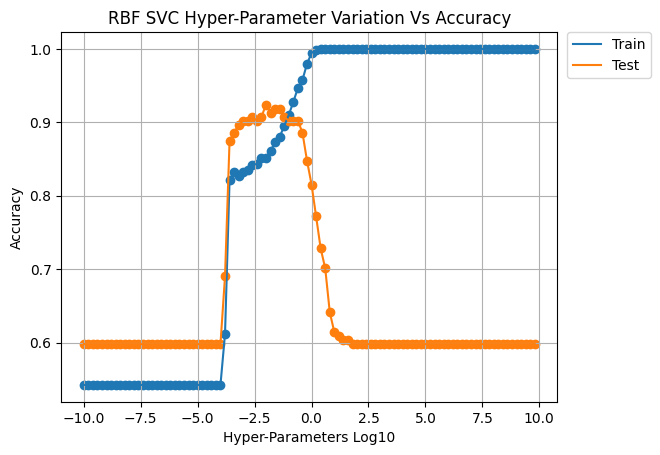

In [57]:
powers = np.arange(-10, 10, 0.2)
gammas = 10.0**powers # fill in the hyper-parameter candidates
results_test = []
results_train = []
for (g,power) in zip(gammas,powers):
    rsvc = SVC(random_state = 7, C=1.0, kernel='rbf', gamma = g)
    clf = rsvc.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    acc = metrics.accuracy_score(y_test, y_pred)
    results_test.append(acc)
    y_pred = clf.predict(X_train_norm)
    acc = metrics.accuracy_score(y_train, y_pred)
    results_train.append(acc)


plt.plot(powers, results_train, label='Train')
plt.scatter(powers, results_train)
plt.plot(powers, results_test, label='Test')
plt.scatter(powers, results_test)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Hyper-Parameters Log10')
plt.ylabel('Accuracy')
plt.title("RBF SVC Hyper-Parameter Variation Vs Accuracy")
plt.savefig(f"./output/figures/RBF_SVC_Hyper-Parameter_Variation_Plot.png", bbox_inches='tight')
plt.grid()
plt.show()


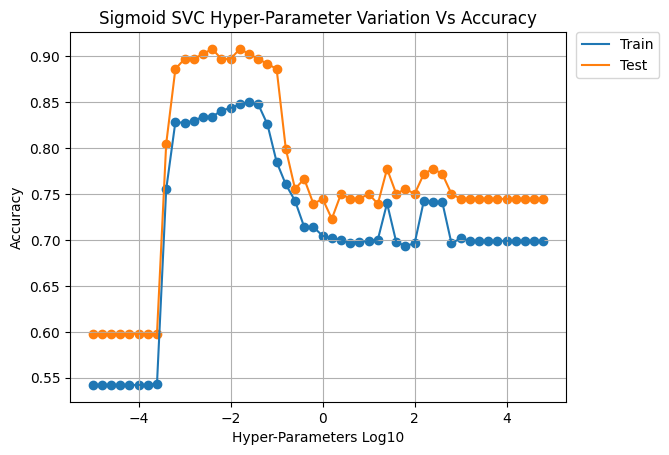

In [58]:
powers = np.arange(-5, 5, 0.2)
gammas = 10.0**powers # fill in the hyper-parameter candidates
results_test = []
results_train = []
for (g,power) in zip(gammas,powers):
    rsvc = SVC(random_state = 7, C=1.0, kernel='sigmoid', gamma = g)
    clf = rsvc.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    acc = metrics.accuracy_score(y_test, y_pred)
    results_test.append(acc)
    y_pred = clf.predict(X_train_norm)
    acc = metrics.accuracy_score(y_train, y_pred)
    results_train.append(acc)


plt.plot(powers, results_train, label='Train')
plt.scatter(powers, results_train)
plt.plot(powers, results_test, label='Test')
plt.scatter(powers, results_test)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Hyper-Parameters Log10')
plt.ylabel('Accuracy')
plt.title("Sigmoid SVC Hyper-Parameter Variation Vs Accuracy")
plt.savefig(f"./output/figures/Sigmoid_SVC_Hyper-Parameter_Variation_Plot.png", bbox_inches='tight')
plt.grid()
plt.show()


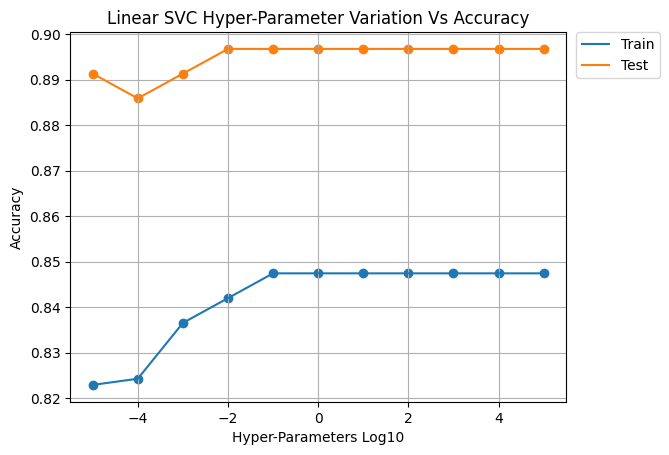

In [59]:
powers = np.arange(-5, 6, 1)
Cs = 10.0**powers # fill in the hyper-parameter candidates
results_test = []
results_train = []
for (c, power) in zip(Cs, powers):
    lsvc = LinearSVC(random_state = 7, C = c, dual=False)
    clf = lsvc.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    acc = metrics.accuracy_score(y_test, y_pred)
    results_test.append(acc)
    y_pred = clf.predict(X_train_norm)
    acc = metrics.accuracy_score(y_train, y_pred)
    results_train.append(acc)


plt.plot(powers, results_train, label='Train')
plt.scatter(powers, results_train)
plt.plot(powers, results_test, label='Test')
plt.scatter(powers, results_test)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Hyper-Parameters Log10')
plt.ylabel('Accuracy')
plt.title("Linear SVC Hyper-Parameter Variation Vs Accuracy")
plt.savefig(f"output/figures/Linear_SVC_Hyper-Parameter_Variation_Plot.png", bbox_inches='tight')
plt.grid()
plt.show()


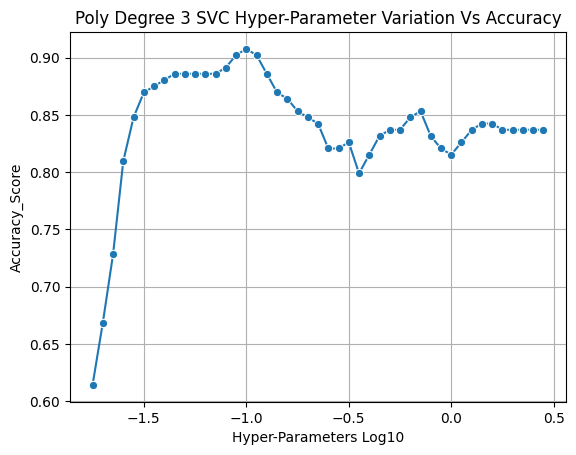

{-1.75: 0.6141304347826086, -1.7: 0.6684782608695652, -1.65: 0.7282608695652174, -1.5999999999999999: 0.8097826086956522, -1.5499999999999998: 0.8478260869565217, -1.4999999999999998: 0.8695652173913043, -1.4499999999999997: 0.875, -1.3999999999999997: 0.8804347826086957, -1.3499999999999996: 0.8858695652173914, -1.2999999999999996: 0.8858695652173914, -1.2499999999999996: 0.8858695652173914, -1.1999999999999995: 0.8858695652173914, -1.1499999999999995: 0.8858695652173914, -1.0999999999999994: 0.8913043478260869, -1.0499999999999994: 0.9021739130434783, -0.9999999999999993: 0.907608695652174, -0.9499999999999993: 0.9021739130434783, -0.8999999999999992: 0.8858695652173914, -0.8499999999999992: 0.8695652173913043, -0.7999999999999992: 0.8641304347826086, -0.7499999999999991: 0.8532608695652174, -0.6999999999999991: 0.8478260869565217, -0.649999999999999: 0.842391304347826, -0.599999999999999: 0.8206521739130435, -0.5499999999999989: 0.8206521739130435, -0.4999999999999989: 0.82608695652

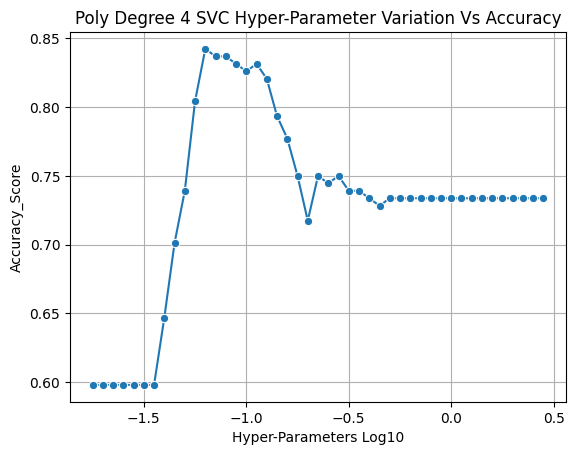

{-1.75: 0.5978260869565217, -1.7: 0.5978260869565217, -1.65: 0.5978260869565217, -1.5999999999999999: 0.5978260869565217, -1.5499999999999998: 0.5978260869565217, -1.4999999999999998: 0.5978260869565217, -1.4499999999999997: 0.5978260869565217, -1.3999999999999997: 0.6467391304347826, -1.3499999999999996: 0.7010869565217391, -1.2999999999999996: 0.7391304347826086, -1.2499999999999996: 0.8043478260869565, -1.1999999999999995: 0.842391304347826, -1.1499999999999995: 0.8369565217391305, -1.0999999999999994: 0.8369565217391305, -1.0499999999999994: 0.8315217391304348, -0.9999999999999993: 0.8260869565217391, -0.9499999999999993: 0.8315217391304348, -0.8999999999999992: 0.8206521739130435, -0.8499999999999992: 0.7934782608695652, -0.7999999999999992: 0.7771739130434783, -0.7499999999999991: 0.75, -0.6999999999999991: 0.717391304347826, -0.649999999999999: 0.75, -0.599999999999999: 0.7445652173913043, -0.5499999999999989: 0.75, -0.4999999999999989: 0.7391304347826086, -0.44999999999999885: 

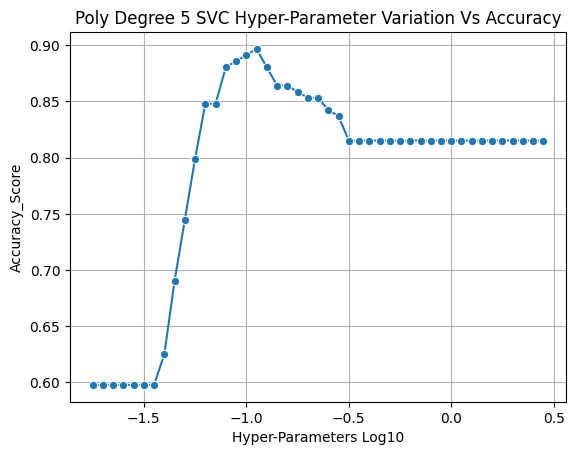

{-1.75: 0.5978260869565217, -1.7: 0.5978260869565217, -1.65: 0.5978260869565217, -1.5999999999999999: 0.5978260869565217, -1.5499999999999998: 0.5978260869565217, -1.4999999999999998: 0.5978260869565217, -1.4499999999999997: 0.5978260869565217, -1.3999999999999997: 0.625, -1.3499999999999996: 0.6902173913043478, -1.2999999999999996: 0.7445652173913043, -1.2499999999999996: 0.7989130434782609, -1.1999999999999995: 0.8478260869565217, -1.1499999999999995: 0.8478260869565217, -1.0999999999999994: 0.8804347826086957, -1.0499999999999994: 0.8858695652173914, -0.9999999999999993: 0.8913043478260869, -0.9499999999999993: 0.8967391304347826, -0.8999999999999992: 0.8804347826086957, -0.8499999999999992: 0.8641304347826086, -0.7999999999999992: 0.8641304347826086, -0.7499999999999991: 0.8586956521739131, -0.6999999999999991: 0.8532608695652174, -0.649999999999999: 0.8532608695652174, -0.599999999999999: 0.842391304347826, -0.5499999999999989: 0.8369565217391305, -0.4999999999999989: 0.8152173913

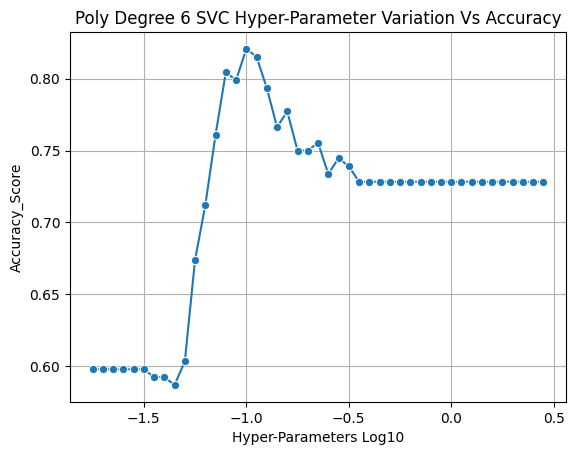

{-1.75: 0.5978260869565217, -1.7: 0.5978260869565217, -1.65: 0.5978260869565217, -1.5999999999999999: 0.5978260869565217, -1.5499999999999998: 0.5978260869565217, -1.4999999999999998: 0.5978260869565217, -1.4499999999999997: 0.592391304347826, -1.3999999999999997: 0.592391304347826, -1.3499999999999996: 0.5869565217391305, -1.2999999999999996: 0.6032608695652174, -1.2499999999999996: 0.6739130434782609, -1.1999999999999995: 0.7119565217391305, -1.1499999999999995: 0.7608695652173914, -1.0999999999999994: 0.8043478260869565, -1.0499999999999994: 0.7989130434782609, -0.9999999999999993: 0.8206521739130435, -0.9499999999999993: 0.8152173913043478, -0.8999999999999992: 0.7934782608695652, -0.8499999999999992: 0.7663043478260869, -0.7999999999999992: 0.7771739130434783, -0.7499999999999991: 0.75, -0.6999999999999991: 0.75, -0.649999999999999: 0.7554347826086957, -0.599999999999999: 0.7336956521739131, -0.5499999999999989: 0.7445652173913043, -0.4999999999999989: 0.7391304347826086, -0.44999

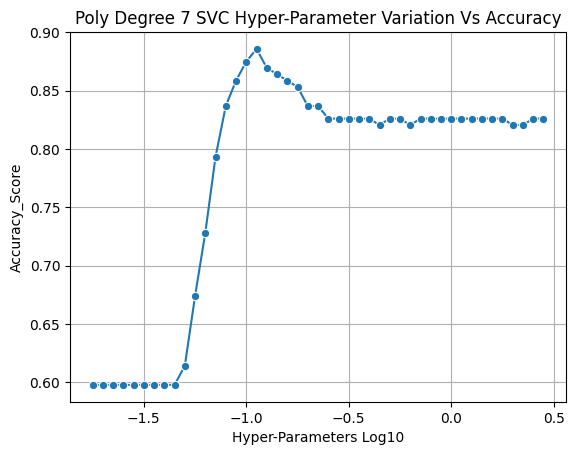

{-1.75: 0.5978260869565217, -1.7: 0.5978260869565217, -1.65: 0.5978260869565217, -1.5999999999999999: 0.5978260869565217, -1.5499999999999998: 0.5978260869565217, -1.4999999999999998: 0.5978260869565217, -1.4499999999999997: 0.5978260869565217, -1.3999999999999997: 0.5978260869565217, -1.3499999999999996: 0.5978260869565217, -1.2999999999999996: 0.6141304347826086, -1.2499999999999996: 0.6739130434782609, -1.1999999999999995: 0.7282608695652174, -1.1499999999999995: 0.7934782608695652, -1.0999999999999994: 0.8369565217391305, -1.0499999999999994: 0.8586956521739131, -0.9999999999999993: 0.875, -0.9499999999999993: 0.8858695652173914, -0.8999999999999992: 0.8695652173913043, -0.8499999999999992: 0.8641304347826086, -0.7999999999999992: 0.8586956521739131, -0.7499999999999991: 0.8532608695652174, -0.6999999999999991: 0.8369565217391305, -0.649999999999999: 0.8369565217391305, -0.599999999999999: 0.8260869565217391, -0.5499999999999989: 0.8260869565217391, -0.4999999999999989: 0.826086956

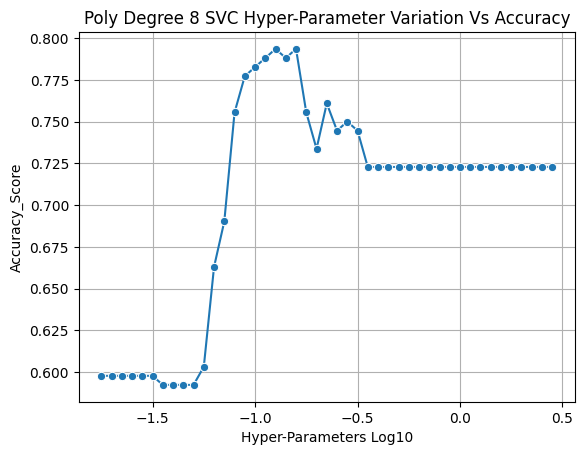

{-1.75: 0.5978260869565217, -1.7: 0.5978260869565217, -1.65: 0.5978260869565217, -1.5999999999999999: 0.5978260869565217, -1.5499999999999998: 0.5978260869565217, -1.4999999999999998: 0.5978260869565217, -1.4499999999999997: 0.592391304347826, -1.3999999999999997: 0.592391304347826, -1.3499999999999996: 0.592391304347826, -1.2999999999999996: 0.592391304347826, -1.2499999999999996: 0.6032608695652174, -1.1999999999999995: 0.6630434782608695, -1.1499999999999995: 0.6902173913043478, -1.0999999999999994: 0.7554347826086957, -1.0499999999999994: 0.7771739130434783, -0.9999999999999993: 0.782608695652174, -0.9499999999999993: 0.7880434782608695, -0.8999999999999992: 0.7934782608695652, -0.8499999999999992: 0.7880434782608695, -0.7999999999999992: 0.7934782608695652, -0.7499999999999991: 0.7554347826086957, -0.6999999999999991: 0.7336956521739131, -0.649999999999999: 0.7608695652173914, -0.599999999999999: 0.7445652173913043, -0.5499999999999989: 0.75, -0.4999999999999989: 0.744565217391304

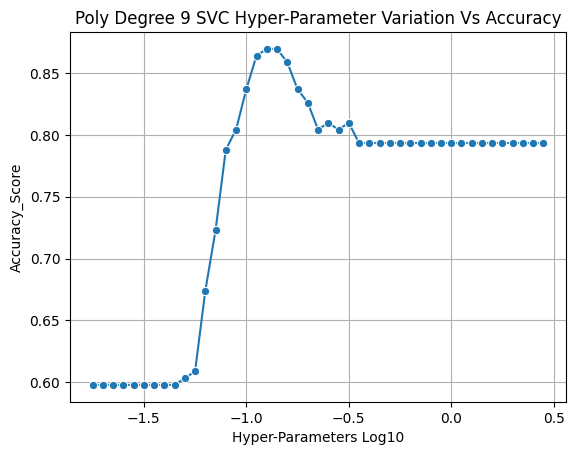

{-1.75: 0.5978260869565217, -1.7: 0.5978260869565217, -1.65: 0.5978260869565217, -1.5999999999999999: 0.5978260869565217, -1.5499999999999998: 0.5978260869565217, -1.4999999999999998: 0.5978260869565217, -1.4499999999999997: 0.5978260869565217, -1.3999999999999997: 0.5978260869565217, -1.3499999999999996: 0.5978260869565217, -1.2999999999999996: 0.6032608695652174, -1.2499999999999996: 0.6086956521739131, -1.1999999999999995: 0.6739130434782609, -1.1499999999999995: 0.7228260869565217, -1.0999999999999994: 0.7880434782608695, -1.0499999999999994: 0.8043478260869565, -0.9999999999999993: 0.8369565217391305, -0.9499999999999993: 0.8641304347826086, -0.8999999999999992: 0.8695652173913043, -0.8499999999999992: 0.8695652173913043, -0.7999999999999992: 0.8586956521739131, -0.7499999999999991: 0.8369565217391305, -0.6999999999999991: 0.8260869565217391, -0.649999999999999: 0.8043478260869565, -0.599999999999999: 0.8097826086956522, -0.5499999999999989: 0.8043478260869565, -0.4999999999999989

In [60]:
powers =  np.arange(-1.75, 0.5, 0.05)
gammas = 10.0**powers # fill in the hyper-parameter candidates
degrees = [3,4,5,6,7,8,9]
total_results = []
for degree in degrees:
    results = {}
    for (g,power) in zip(gammas,powers):
        rsvc = SVC(random_state = 7, C=1.0, kernel='poly', gamma=g, degree=degree)
        clf = rsvc.fit(X_train_norm, y_train)
        y_pred = clf.predict(X_test_norm)
        acc = metrics.accuracy_score(y_test, y_pred)
        results[power] = acc


    acc = list(results.values())
    total_results.append(acc)
    bar_data = {"Accuracy_Score" : acc, "Hyper-Parameters Log10": powers}

    # sns.barplot(x="Hyper-Parameters Log10", y="Accuracy_Score", data=bar_data)
    sns.lineplot(x="Hyper-Parameters Log10", y="Accuracy_Score", data=bar_data, marker='o')
    plt.title(f"Poly Degree {degree} SVC Hyper-Parameter Variation Vs Accuracy")
    plt.grid()
    plt.show()

    print(results)
    print(max(results.values()))

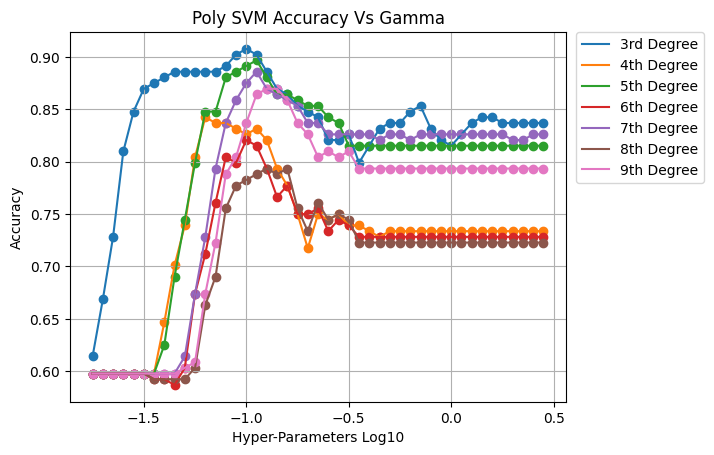

In [61]:

# len(total_results[0])
# len(powers)
plt.plot(powers, total_results[0], label='3rd Degree')
plt.scatter(powers, total_results[0])
plt.plot(powers, total_results[1], label='4th Degree')
plt.scatter(powers, total_results[1])
plt.plot(powers, total_results[2], label='5th Degree')
plt.scatter(powers, total_results[2])
plt.plot(powers, total_results[3], label='6th Degree')
plt.scatter(powers, total_results[3])
plt.plot(powers, total_results[4], label='7th Degree')
plt.scatter(powers, total_results[4])
plt.plot(powers, total_results[5], label='8th Degree')
plt.scatter(powers, total_results[5])
plt.plot(powers, total_results[6], label='9th Degree')
plt.scatter(powers, total_results[6])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel('Hyper-Parameters Log10')
plt.ylabel('Accuracy')
plt.title("Poly SVM Accuracy Vs Gamma")
plt.grid(which="both")
plt.savefig("./output/figures/PolySVM_gammaSweep.png", bbox_inches='tight')
plt.show()

## SVM initial Findings

- We see that linear kernel was not effective in classifying the dataset 
- RBF is the best kernel
- Poly of 3rd degree performed the best 
- all three poly sigmoid and RBF better classified the test dataset when compared to the optimal random forest model



In [62]:
# Perform a search for all 3 models above

n_folds = 10

# configure the cross-validation procedure
cv = KFold(n_splits=n_folds, shuffle=True, random_state=1)


powers =  np.arange(-1.25, -0.25, 0.01)
gammas_poly = 10.0**powers

powers =  np.arange(-4, 0, 0.1)
gammas_sig = 10.0**powers # fill in the hyper-parameter candidates

powers =  np.arange(-4.5, 1, 0.05)
gamma_rbf = 10.0**powers # fill in the hyper-parameter candidates

# Params
space_rbf = {"gamma" : gamma_rbf}
space_sig = {"gamma" : gammas_sig}
space_poly = {"gamma" : gammas_poly}

# Models
rbf =  SVC(random_state=7,C=1.0, kernel='rbf')
sig = SVC(random_state=7, C=1.0, kernel='sigmoid')
poly =SVC(random_state=7, C=1.0, kernel='poly', degree=3)

# Grid Search with kfolds
search_rbf = GridSearchCV(rbf, space_rbf, scoring='accuracy', n_jobs=-1, cv=cv) # CV is the kfold
search_sig = GridSearchCV(sig, space_sig, scoring='accuracy', n_jobs=-1, cv=cv) # CV is the kfold
search_poly = GridSearchCV(poly, space_poly, scoring='accuracy', n_jobs=-1, cv=cv) # CV is the kfold

result_rbf = search_rbf.fit(X_train_norm, y_train)
result_sig = search_sig.fit(X_train_norm, y_train)
result_poly = search_poly.fit(X_train_norm, y_train)

print(result_rbf.best_params_)
print(result_sig.best_params_)
print(result_poly.best_params_)

best_model_rbf = result_rbf.best_estimator_
best_model_sig = result_sig.best_estimator_
best_model_poly = result_poly.best_estimator_

ya = best_model_rbf.predict(X_test_norm)
yb = best_model_sig.predict(X_test_norm)
yc = best_model_poly.predict(X_test_norm)

acc_rbf = metrics.accuracy_score(ya, y_test)
acc_sig = metrics.accuracy_score(yb, y_test)
acc_poly = metrics.accuracy_score(yc, y_test)

print(f"RBF Acc = {acc_rbf}, Sig Acc = {acc_sig}, Poly Acc = {acc_poly}")

{'gamma': 0.15848931924610654}
{'gamma': 0.03162277660168396}
{'gamma': 0.057543993733715694}
RBF Acc = 0.9021739130434783, Sig Acc = 0.907608695652174, Poly Acc = 0.8858695652173914


RBF and Poly performace was reduced!  

In [66]:
ya = best_model_sig.predict(X_test_norm)
yb = best_model_sig.predict(X_train_norm)
yc = best_model_sig.predict(X_norm)
acc_a = metrics.accuracy_score(ya, y_test)
acc_b = metrics.accuracy_score(yb, y_train)
acc_c = metrics.accuracy_score(yc, y)

print("################## Sig Model Trained with K-Folds ##################")
print(f'Test Acc = {acc_a*100}\nTrain Acc = {acc_b*100}\nFull Data Acc = {acc_c*100}\n\n')

ya = best_model_rbf.predict(X_test_norm)
yb = best_model_rbf.predict(X_train_norm)
yc = best_model_rbf.predict(X_norm)
acc_a = metrics.accuracy_score(ya, y_test)
acc_b = metrics.accuracy_score(yb, y_train)
acc_c = metrics.accuracy_score(yc, y)

print("################## RBF Model Trained with K-Folds ##################")
print(f'Test Acc = {acc_a*100}\nTrain Acc = {acc_b*100}\nFull Data Acc = {acc_c*100}\n\n')

ya = best_model_poly.predict(X_test_norm)
yb = best_model_poly.predict(X_train_norm)
yc = best_model_poly.predict(X_norm)
acc_a = metrics.accuracy_score(ya, y_test)
acc_b = metrics.accuracy_score(yb, y_train)
acc_c = metrics.accuracy_score(yc, y)

print("################## Poly Model Trained with K-Folds ##################")
print(f'Test Acc = {acc_a*100}\nTrain Acc = {acc_b*100}\nFull Data Acc = {acc_c*100}\n\n')

rbf_NoKfold = SVC(random_state=7,C=1.0, kernel='rbf', gamma=10**(-2))
rbf_NoKfold.fit(X_train_norm, y_train)
ya = rbf_NoKfold.predict(X_test_norm)
yb = rbf_NoKfold.predict(X_train_norm)
yc = rbf_NoKfold.predict(X_norm)
acc_a = metrics.accuracy_score(ya, y_test)
acc_b = metrics.accuracy_score(yb, y_train)
acc_c = metrics.accuracy_score(yc, y)

print("################## RBF Model Trained without K-Folds ##################")
print(f'Test Acc = {acc_a*100}\nTrain Acc = {acc_b*100}\nFull Data Acc = {acc_c*100}')

################## Sig Model Trained with K-Folds ##################
Test Acc = 90.76086956521739
Train Acc = 84.87738419618529
Full Data Acc = 85.72984749455338


################## RBF Model Trained with K-Folds ##################
Test Acc = 90.21739130434783
Train Acc = 92.77929155313352
Full Data Acc = 92.15686274509804


################## Poly Model Trained with K-Folds ##################
Test Acc = 88.58695652173914
Train Acc = 87.73841961852861
Full Data Acc = 87.7995642701525


################## RBF Model Trained without K-Folds ##################
Test Acc = 92.3913043478261
Train Acc = 85.14986376021798
Full Data Acc = 86.49237472766885


## Clearly RBF with K-fold was the best predictor overall for SVC

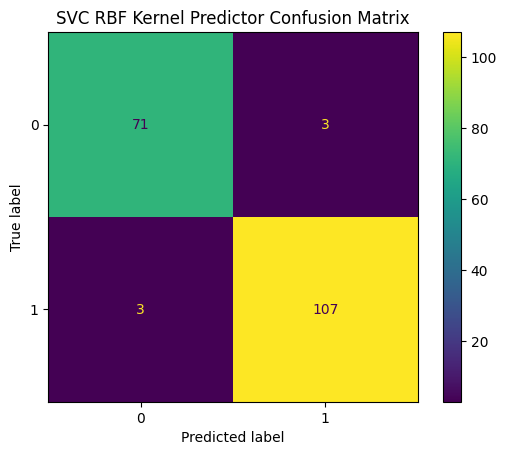

In [64]:
ConfusionMatrixDisplay.from_predictions(ya, ypred_test)
plt.title("SVC RBF Kernel Predictor Confusion Matrix")
plt.savefig("./output/figures/SVC_testConfusionMatrix.png")

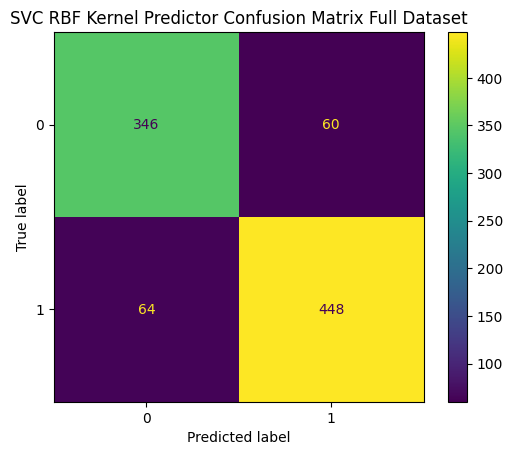

In [65]:
ConfusionMatrixDisplay.from_predictions(yc, y)
plt.title("SVC RBF Kernel Predictor Confusion Matrix Full Dataset")
plt.savefig("./output/figures/SVC_FullConfusionMatrix.png")